In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import pycountry
import warnings
warnings.filterwarnings('ignore')

## Lettura CSV e data cleaning

In [2]:
df = pd.read_csv('data_science_salaries.csv')
df = df.drop(['salary_currency', 'salary'], axis=1)
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,74130,Austria,Large


## Confronto media, min e max salari per posizione

In [3]:
df.groupby('job_title')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
AI Architect,10.0,232058.600000,68939.474466,137000.0,198987.50,209968.0,295325.00,330000.0
AI Developer,18.0,141140.888889,72934.543987,50000.0,76162.25,127000.0,198000.00,275000.0
AI Engineer,48.0,162616.250000,88607.412507,21593.0,94818.75,163000.0,214000.00,372000.0
AI Product Manager,1.0,120000.000000,NaN,120000.0,120000.00,120000.0,120000.00,120000.0
AI Programmer,6.0,67382.333333,29568.541883,40000.0,45051.75,65103.5,73065.25,120000.0
...,...,...,...,...,...,...,...,...
Sales Data Analyst,1.0,60000.000000,NaN,60000.0,60000.00,60000.0,60000.00,60000.0
Software Data Engineer,3.0,111627.666667,86096.619541,50000.0,62441.50,74883.0,142441.50,210000.0
Staff Data Analyst,3.0,79917.000000,87940.122657,15000.0,29876.50,44753.0,112375.50,179998.0


## Salario medio per livello di esperienza

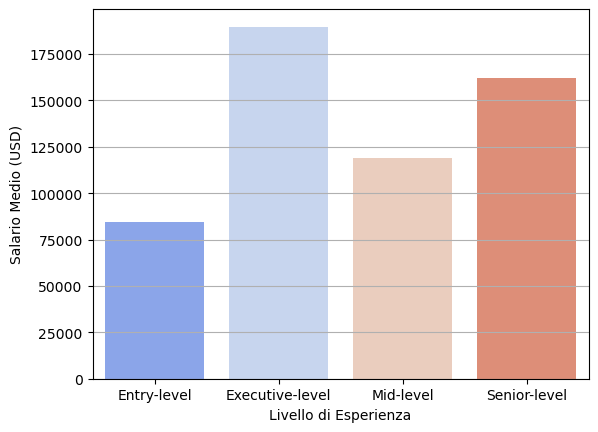

In [4]:
plt.grid(True)
salario_esperienza = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
sns.barplot(data=salario_esperienza, x='experience_level', y='salary_in_usd', hue="experience_level", palette="coolwarm")
plt.xlabel('Livello di Esperienza')
plt.ylabel('Salario Medio (USD)')
plt.show()

## Andamento salario del ruolo "Data Analyst" negli anni

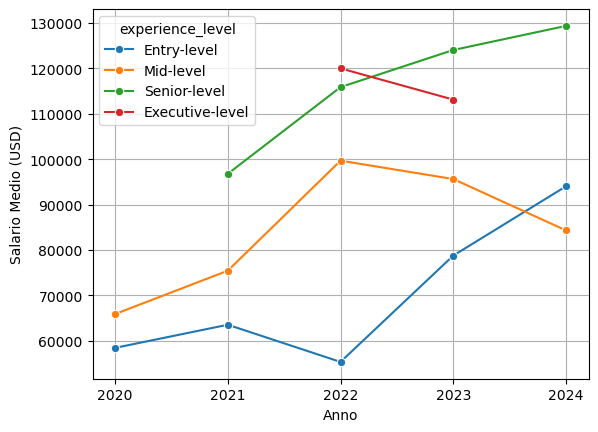

In [5]:
plt.xlabel('Anno')
plt.ylabel('Salario Medio (USD)')
plt.grid(True)
data_analyst_df = df[df['job_title'] == 'Data Analyst'].copy().sort_values(by='work_year')
data_analyst_df['work_year'] = data_analyst_df['work_year'].astype(str)
sns.lineplot(data=data_analyst_df, x='work_year', y='salary_in_usd', hue='experience_level', errorbar=None, marker='o')
plt.show()

## Ruolo con salario medio piu alto

In [6]:
media_salario_posizione = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
ruolo_piu_pagato = media_salario_posizione.loc[media_salario_posizione['salary_in_usd'].idxmax()]
print("Il ruolo piu' pagato è: {} con una media di ${}".format(ruolo_piu_pagato.job_title, media_salario_posizione['salary_in_usd'].max()))

Il ruolo piu' pagato è: Analytics Engineering Manager con una media di $399880.0


## I ruoli con maggior copertura

In [7]:
df['job_title'].value_counts()

job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
                             ... 
Deep Learning Researcher        1
Power BI Developer              1
Marketing Data Scientist        1
AI Product Manager              1
Sales Data Analyst              1
Name: count, Length: 132, dtype: int64

## Distribuzione geografica del salario medio di un Data Engineer anno 2023

In [8]:
data_engineer_2024 = df[(df['job_title'] == 'Data Engineer') & (df['work_year'] == 2023)]
d_e_media = data_engineer_2024.groupby('company_location')['salary_in_usd'].mean().sort_values().reset_index()

In [9]:
d_e_media

,company_location,salary_in_usd
0,Poland,44876.000000
1,Portugal,44989.000000
2,Estonia,50529.000000
3,Slovenia,62081.000000
4,Argentina,65000.000000
5,Brazil,66000.000000
6,Mexico,66000.000000
7,Italy,69005.000000
8,Spain,70671.625000
9,India,72656.250000


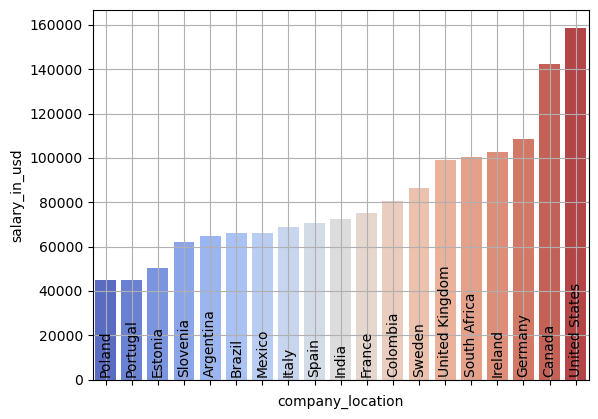

In [10]:
plt.clf()
bar = sns.barplot(data=d_e_media, x='company_location', y='salary_in_usd', hue="company_location", palette="coolwarm")
for idx, value in enumerate(d_e_media['company_location']):
    plt.text(idx, 1000, str(d_e_media['company_location'][idx]), ha='center', va='bottom', rotation=90)
plt.gca().set_xticklabels([])
plt.grid(True, zorder=0)

In [11]:
def get_iso_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [12]:
d_e_media['iso_a3'] = d_e_media['company_location'].apply(get_iso_code)

In [13]:
d_e_media

,company_location,salary_in_usd,iso_a3
0,Poland,44876.000000,POL
1,Portugal,44989.000000,PRT
2,Estonia,50529.000000,EST
3,Slovenia,62081.000000,SVN
4,Argentina,65000.000000,ARG
5,Brazil,66000.000000,BRA
6,Mexico,66000.000000,MEX
7,Italy,69005.000000,ITA
8,Spain,70671.625000,ESP
9,India,72656.250000,IND


In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [15]:
join = world.set_index('iso_a3').join(d_e_media.set_index('iso_a3'))

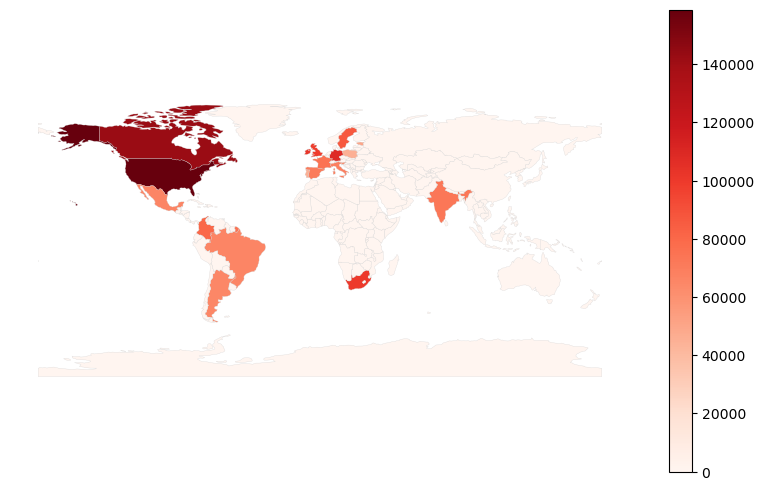

In [16]:
join['salary_in_usd'] = join['salary_in_usd'].fillna(0)
fig, ax = plt.subplots(figsize=(10, 6))
join.plot(column='salary_in_usd', linewidth=0.2, 
          ax=ax, edgecolor='lightgray', legend=True, 
          cmap='Reds',
          missing_kwds={'color': 'gray'})
ax.set_axis_off()
plt.show()

## Confronto delle Retribuzioni in Aziende di Diverse Dimensioni

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

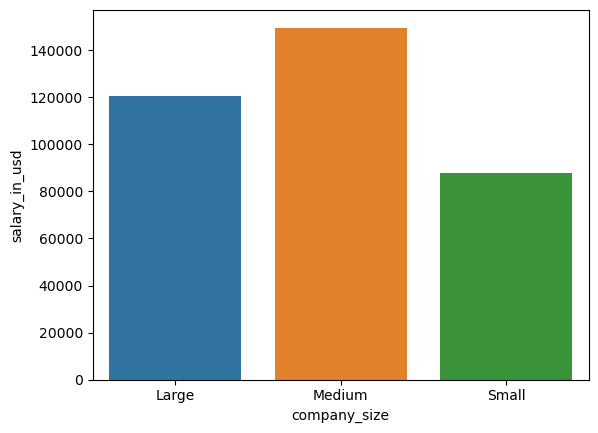

In [17]:
sns.barplot(data=df.groupby('company_size')['salary_in_usd'].mean().reset_index(), x='company_size', y='salary_in_usd', hue='company_size')

## Confronto del tipo di lavoro (ibrido, remote o in sede) in Aziende di Diverse Dimensioni

<Axes: xlabel='company_size', ylabel='count'>

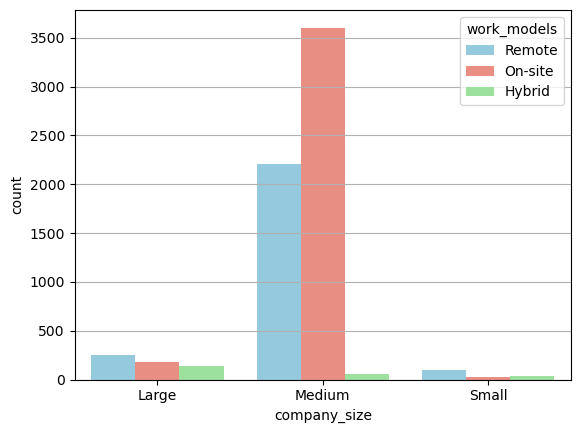

In [18]:
colors = {'Remote': 'skyblue', 'On-site':'salmon', 'Hybrid':'lightgreen'}
plt.grid(True)
d = df.groupby('company_size')['work_models'].value_counts().reset_index()
sns.barplot(data=d, x='company_size', y='count', hue='work_models', palette=colors)

In [19]:
d

,company_size,work_models,count
0,Large,Remote,255
1,Large,On-site,178
2,Large,Hybrid,136
3,Medium,On-site,3604
4,Medium,Remote,2203
5,Medium,Hybrid,53
6,Small,Remote,103
7,Small,Hybrid,36
8,Small,On-site,31


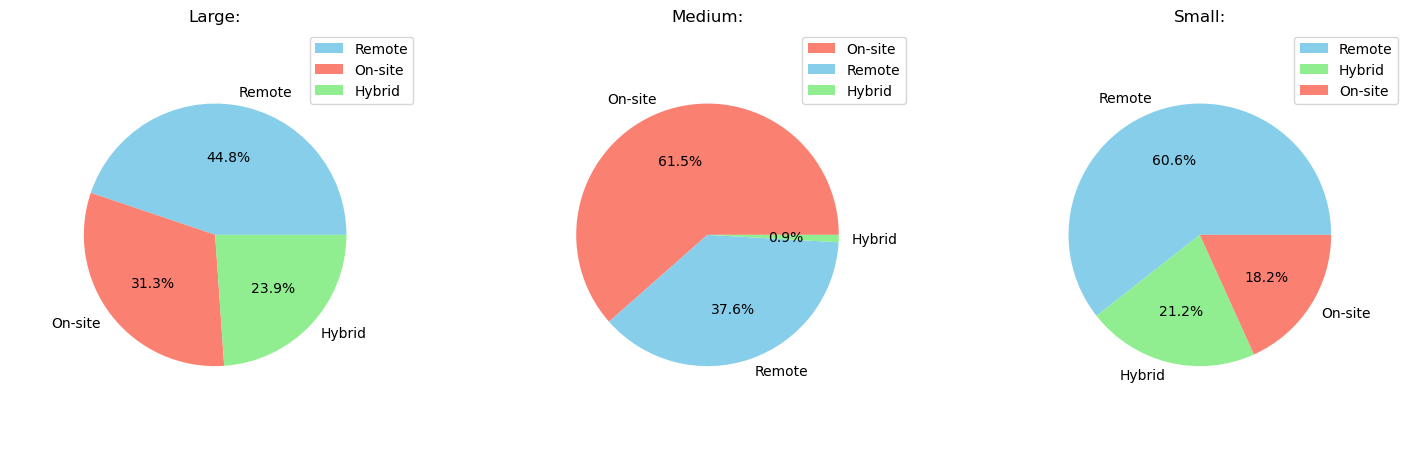

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10), squeeze=False)
for idx, tipo in enumerate(d['company_size'].unique()):
    set = d[d['company_size'] == tipo].sort_values(by='count', ascending=False)
    cont = set['count']
    labels = set['work_models']
    axes[0][idx].pie(cont, labels=labels, radius=0.8, autopct='%1.1f%%', colors=[colors[l] for l in labels])
    axes[0][idx].set_title(f'{tipo}:')
    axes[0][idx].legend(labels, loc='upper right')
plt.show()


# Da rivedere! Modello rete neurale totalmente sbagliato ❌
## Predirre il salario USD date variabili indipendenti

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,United States,Medium


### Controllo se il dataset ha valori nulli

In [23]:
valori_nulli = df.isnull().sum()
valori_nulli

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

### Assegno alla categoria "experience-level" un numero
##### Poiche' rappresentano una sequenza con ordine intrinseco (progressione della carriera)
##### 0 - Entry level
##### 1 - Mid level
##### 2 - Senior level
##### 3 - Executive level

In [24]:
esperienza = {
    "entry-level": 0,
    "mid-level": 1,
    "senior-level": 2,
    "executive-level": 3
}
df['experience_level'] = df['experience_level'].str.lower().replace(esperienza)
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,Data Engineer,1,Full-time,Remote,2024,United States,148100,United States,Medium
1,Data Engineer,1,Full-time,Remote,2024,United States,98700,United States,Medium
2,Data Scientist,2,Full-time,Remote,2024,United States,140032,United States,Medium
3,Data Scientist,2,Full-time,Remote,2024,United States,100022,United States,Medium
4,BI Developer,1,Full-time,On-site,2024,United States,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,0,Contract,Hybrid,2020,Canada,44753,Canada,Large
6595,Staff Data Analyst,3,Full-time,On-site,2020,Nigeria,15000,Canada,Medium
6596,Machine Learning Manager,2,Full-time,Hybrid,2020,Canada,117104,Canada,Large
6597,Data Engineer,1,Full-time,Hybrid,2020,Austria,74130,Austria,Large


### Analisi Dati: Relazioni

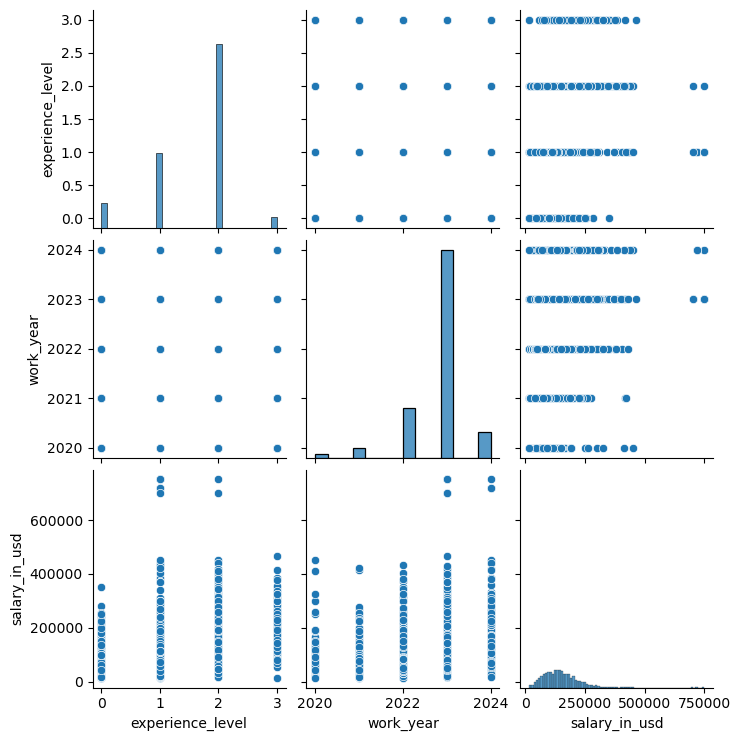

In [25]:
sns.pairplot(df, palette="coolwarm")
plt.show()

Salario e anno di lavoro REGRESSIONE LINEARE ✔️

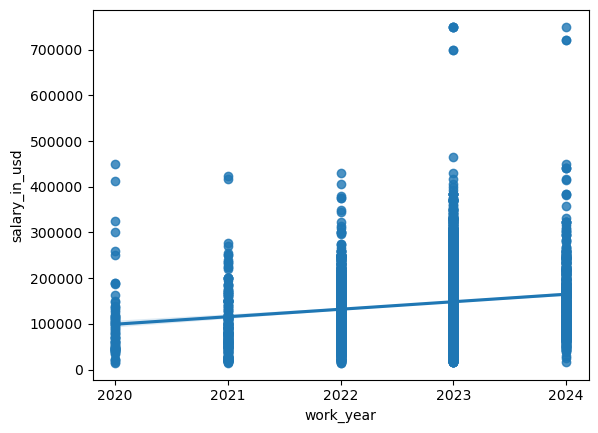

In [26]:
sns.regplot(x='work_year', y='salary_in_usd', data=df)
plt.xticks(ticks=df['work_year'].unique(), labels=df['work_year'].unique())
plt.show()

Salario e titolo ruolo REGRESSIONE LINEARE ❌

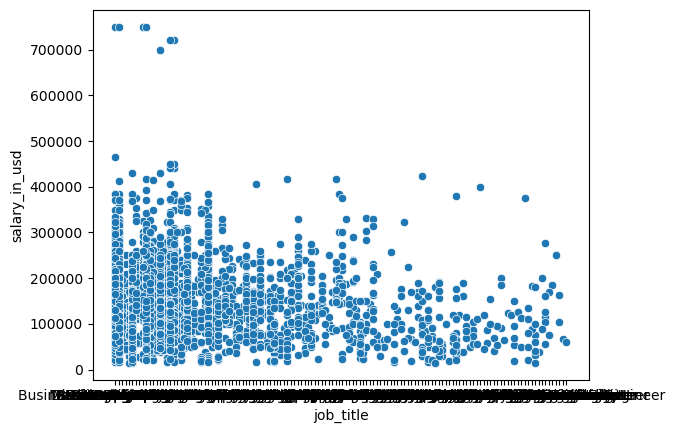

In [27]:


sns.scatterplot(x='job_title', y='salary_in_usd', data=df)
plt.show()

Salario e tipo contratto REGRESSIONE LINEARE ❌

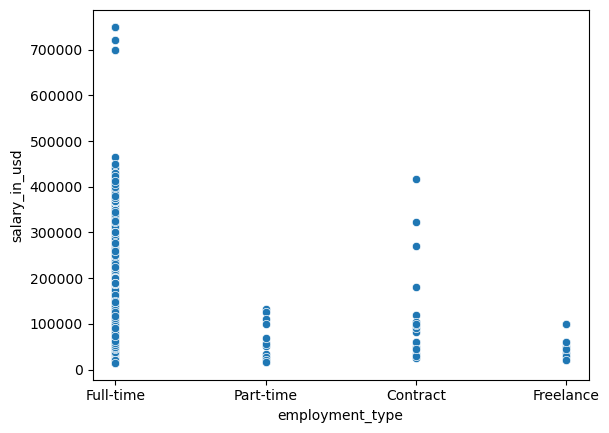

In [28]:
sns.scatterplot(x='employment_type', y='salary_in_usd', data=df)
plt.show()

Salario e livello esperienza REGRESSIONE LINEARE ✔️

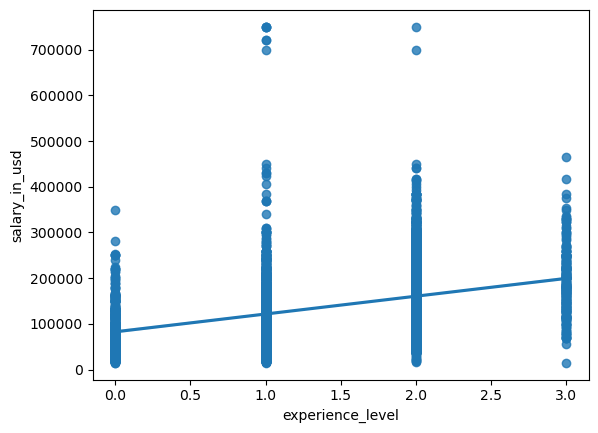

In [29]:
sns.regplot(x='experience_level', y='salary_in_usd', data=df)
plt.show()

In [30]:
df_encoded = pd.get_dummies(df, columns=['work_year','job_title', 'work_models', 'experience_level', 'employment_type', 'company_location', 'company_size'])
df_encoded = df_encoded.rename(columns=lambda x: x.replace(' ', '_').lower())
df_encoded

,employee_residence,salary_in_usd,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024,job_title_ai_architect,job_title_ai_developer,job_title_ai_engineer,...,company_location_thailand,company_location_turkey,company_location_ukraine,company_location_united_arab_emirates,company_location_united_kingdom,company_location_united_states,company_location_vietnam,company_size_large,company_size_medium,company_size_small
0,United States,148100,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,United States,98700,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,United States,140032,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,United States,100022,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,United States,120000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,Canada,44753,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6595,Nigeria,15000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6596,Canada,117104,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6597,Austria,74130,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
X = df_encoded.drop(['salary_in_usd', 'employee_residence'], axis=1) 
y = df_encoded['salary_in_usd']

In [32]:
dt = df_encoded.drop(['salary_in_usd', 'employee_residence'], axis=1)
dt

,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024,job_title_ai_architect,job_title_ai_developer,job_title_ai_engineer,job_title_ai_product_manager,job_title_ai_programmer,...,company_location_thailand,company_location_turkey,company_location_ukraine,company_location_united_arab_emirates,company_location_united_kingdom,company_location_united_states,company_location_vietnam,company_size_large,company_size_medium,company_size_small
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6595,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6596,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6597,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [46]:
y_pred = model.predict(X_test_scaled)

In [47]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 4180932086.379498
Mean Absolute Error: 45154.81520399115
